In [1]:
import copy
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
from lmcv_tools.models.geometry import NURBS_Curve, NURBS_Surface

In [26]:
def show_nurbs(nurbs):
    plt.gca().set_aspect(1)

    points = [nurbs(t) for t in np.linspace(0, 1, 100)]
    x = [p[0] for p in points]
    y = [p[1] for p in points]
    plt.plot(x, y)

    x = [p[0] for p in nurbs.control_points]
    y = [p[1] for p in nurbs.control_points]
    plt.plot(x, y, 'o--')

    plt.xlim(-0.1, 1.1)
    plt.ylim(-0.1, 1.1)

    plt.grid()
    plt.show()

#### 1 - Slit Annular Plate

[1.0, 0.804737854124365, 0.804737854124365, 1.0, 0.804737854124365, 0.804737854124365, 1.0, 0.804737854124365, 0.804737854124365, 1.0, 0.804737854124365, 0.804737854124365, 1.0]
[0, 0, 0, 0, 0.25, 0.25, 0.25, 0.5, 0.5, 0.5, 0.75, 0.75, 0.75, 1, 1, 1, 1]
[[1.0, 0.0], [1.0, 0.585786437626905], [0.585786437626905, 1.0], [0.0, 1.0], [-0.585786437626905, 1.0], [-1.0, 0.585786437626905], [-1.0, 0.0], [-1.0, -0.585786437626905], [-0.585786437626905, -1.0], [0.0, -1.0], [0.585786437626905, -1.0], [1.0, -0.585786437626905], [1.0, -0.0]]


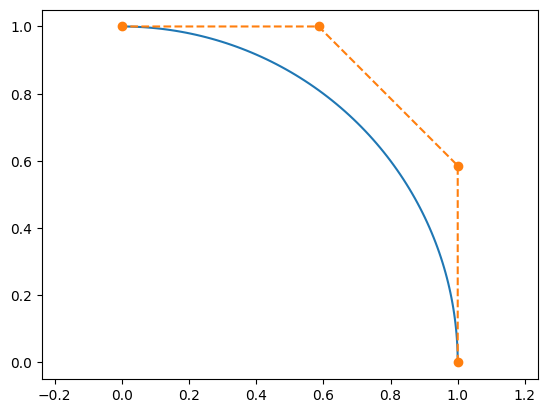

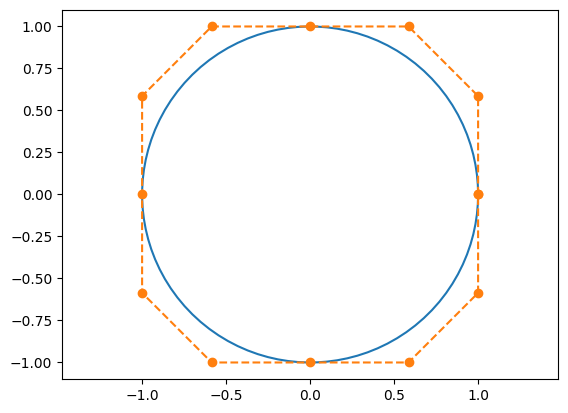

In [7]:
# Fase 1 - Um quarto da geometria
dy = 2
quarter = NURBS_Curve(
    degree = dy,
    knot_vector = [0, 0, 0, 1, 1, 1],
    control_points = [
        [1.0, 0.0],
        [1.0, 1.0],
        [0.0, 1.0],
    ],
    weights = [
        1.0,
        (2 ** 0.5 / 2),
        1.0
    ]
)

# Fase 2 - Elevação de grau
quarter.degree_elevation(1)

# Fase 3 - Discretização
ny = 1
knots = [i / ny for i in range(1, ny)]
quarter.knot_insertions(knots)

# Fase 4 - Composição da geometria completa
# Fase 4.1 - Weights
weights = quarter.weights.copy()
repeat = weights[1:]
for _ in range(3):
    weights.extend(repeat)
print(weights)

# Fase 4.2 - Knot Vector
dy = quarter.basis.degree
repeat = [k / 4 for k in knots] + [1/4] * dy
knot_vector = [0] * (1 + quarter.basis.degree)
for _ in range(4):
    knot_vector.extend(repeat)
    repeat = [k + 1/4 for k in repeat]
knot_vector = knot_vector[:-dy]
knot_vector.extend([1] * (1 + quarter.basis.degree))
print(knot_vector)

# Fase 4.3 - Control Points
control_points = copy.deepcopy(quarter.control_points)
repeat = copy.deepcopy(control_points)
repeat = repeat[-2::-1]
for i in range(len(repeat)):
    repeat[i][0] = -repeat[i][0]
control_points.extend(repeat)
repeat = copy.deepcopy(control_points)
repeat = repeat[-2::-1]
for i in range(len(repeat)):
    repeat[i][1] = -repeat[i][1]
control_points.extend(repeat)
print(control_points)

# Fase 4.4 - Efetivando criação do círculo

circle = NURBS_Curve(dy, knot_vector, control_points, weights)

show_nurbs(quarter)
show_nurbs(circle)

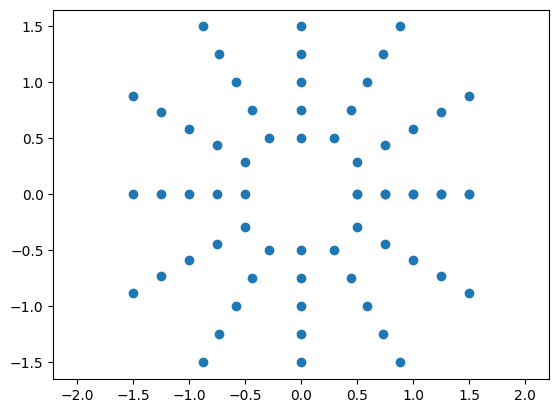

In [8]:
x, y = list(), list()
for unit_point, w in zip(circle.control_points, circle.weights):
    for r in np.linspace(0.5, 1.5, 5):
        x.append(unit_point[0] * r)
        y.append(unit_point[1] * r)

plt.gca().axis('equal')
plt.scatter(x, y)
plt.show()

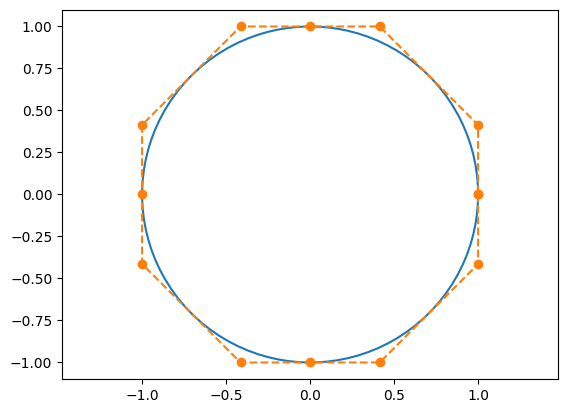

In [9]:
circle = NURBS_Curve(
    degree = 1,
    knot_vector = [0, 0, 1, 1],
    control_points = [
        [0.0, 0.0],
        [1.0, 0.0],
    ],
    weights = [1.0, 1.0]
)
circle.degree_elevation(1)
circle.knot_insertions([
    1/4, 1/4,
    2/4, 2/4,
    3/4, 3/4
])
circle.control_points = [
    [+1.0, +0.0],
    [+1.0, -1.0],
    [+0.0, -1.0],
    [-1.0, -1.0],
    [-1.0, +0.0],
    [-1.0, +1.0],
    [+0.0, +1.0],
    [+1.0, +1.0],
    [+1.0, +0.0],
]
w = sqrt(2) / 2
circle.weights = [
    1.0,
    w,
    1.0,
    w,
    1.0,
    w,
    1.0,
    w,
    1.0,
]

# Fazendo knot insertions
ny = 2
ks = [8, 6, 4, 2]
for j, k in enumerate(ks):
    for i in reversed(range(1, ny)):
        circle.knot_insertion(k, i * (1 / 4) / ny + (3 - j) / 4)

# circle.knot_insertion(2, 1/8)
# circle.knot_insertion(5, 3/8)
# circle.knot_insertion(8, 5/8)
# circle.knot_insertion(11, 7/8)

plt.gca().axis('equal')

points = [circle(t) for t in np.linspace(0, 1, 100)]
x = [p[0] for p in points]
y = [p[1] for p in points]
plt.plot(x, y)

x = [p[0] for p in circle.control_points]
y = [p[1] for p in circle.control_points]
plt.plot(x, y, 'o--')

plt.show()

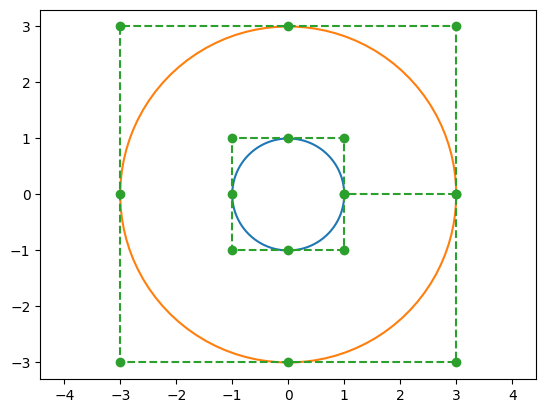

In [10]:
r_i, r_o = 1.0, 3.0
annular = NURBS_Surface(
    degree = [1, 2],
    knot_vectors = [
        [0, 0, 1, 1],
        [0, 0, 0, 0.25, 0.25, 0.5, 0.5, 0.75, 0.75, 1, 1, 1],
    ],
    control_points = [
        [
            [+r_i, +0.0],
            [+r_i, -r_i],
            [+0.0, -r_i],
            [-r_i, -r_i],
            [-r_i, +0.0],
            [-r_i, +r_i],
            [+0.0, +r_i],
            [+r_i, +r_i],
            [+r_i, +0.0],
        ],
        [
            [+r_o, +0.0],
            [+r_o, -r_o],
            [+0.0, -r_o],
            [-r_o, -r_o],
            [-r_o, +0.0],
            [-r_o, +r_o],
            [+0.0, +r_o],
            [+r_o, +r_o],
            [+r_o, +0.0],
        ]
    ],
    weights = [
        [1.0, w, 1.0, w, 1.0, w, 1.0, w, 1.0],
        [1.0, w, 1.0, w, 1.0, w, 1.0, w, 1.0]
    ]
)

plt.gca().axis('equal')

points = [annular(0.0, v) for v in np.linspace(0, 1, 100)]
x = [p[0] for p in points]
y = [p[1] for p in points]
plt.plot(x, y)
points = [annular(1.0, v) for v in np.linspace(0, 1, 100)]
x = [p[0] for p in points]
y = [p[1] for p in points]
plt.plot(x, y)
    
x = [p[0] for line in annular.control_points for p in line]
y = [p[1] for line in annular.control_points for p in line]
plt.plot(x, y, 'o--')

plt.show()


#### 2 - Hemisfere

1.0 1.0 1.0
1.0 1.0240175602085073 1.0240175602085073
1.0 1.044923800899534 1.044923800899534
1.0 1.0572364948730428 1.0572364948730428
1.0 1.0572364948730428 1.0572364948730428
1.0 1.0449238008995343 1.0449238008995343
1.0 1.0240175602085073 1.0240175602085073
1.0 1.0 1.0
1.0 1.0 1.0
1.0 1.0240175602085073 1.0240175602085073
1.0 1.044923800899534 1.044923800899534
1.0 1.0572364948730428 1.0572364948730428
1.0 1.0572364948730428 1.0572364948730428
1.0 1.0449238008995343 1.0449238008995343
1.0 1.0240175602085073 1.0240175602085073
1.0 1.0 1.0
0.963804250687077 1.0 0.963804250687077
0.963804250687077 1.0240175602085073 0.9869524773071692
0.963804250687077 1.044923800899534 1.0071020009510678
0.963804250687077 1.0572364948730428 1.0189690277401446
0.963804250687077 1.0572364948730428 1.0189690277401446
0.963804250687077 1.0449238008995343 1.007102000951068
0.963804250687077 1.0240175602085073 0.9869524773071692
0.963804250687077 1.0 0.963804250687077
0.8891957226704116 1.0 0.8891957226704

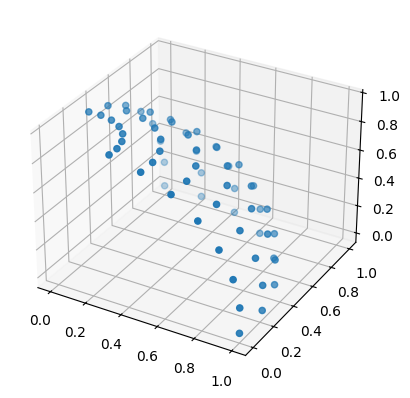

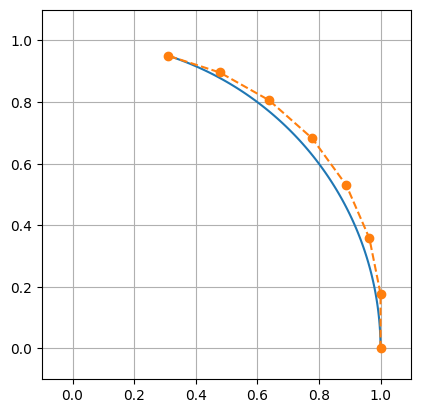

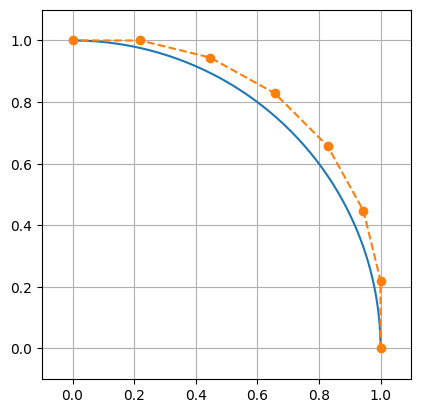

In [48]:
# Fase 1 - Arco de cículo xz
r = 1
theta = 72
theta = theta / 180 * np.pi
arc = NURBS_Curve(
    degree = 2,
    knot_vector = [0, 0, 0, 1, 1, 1],
    control_points = [
        [r, 0.0],
        [r, r * np.tan(theta / 2)],
        [r * np.cos(theta), r * np.sin(theta)],
    ],
    weights = [
        1.0,
        np.cos(theta / 2),
        1.0
    ]
)

# Fase 2 - Quarto de círculo xy
quarter = NURBS_Curve(
    degree = 2,
    knot_vector = [0, 0, 0, 1, 1, 1],
    control_points = [
        [r, 0.0],
        [r, r],
        [0.0, r],
    ],
    weights = [
        1.0,
        sqrt(2) / 2,
        1.0
    ]
)
arc.degree_elevation(5)
quarter.degree_elevation(5)

# Fase 3 - Rotacionar o arco em torno quarto
x, y, z, w = list(), list(), list(), list()
for p1, w1 in zip(arc.control_points, arc.weights):
    r_factor = p1[0] / r

    for p2, w2 in zip(quarter.control_points, quarter.weights):
        angle = np.atan2(p2[1], p2[0])
        quarter_radius = (p2[0] ** 2 + p2[1] ** 2) ** 0.5
        radius = quarter_radius * r_factor
        print(r_factor, quarter_radius, radius)
        x.append(radius * np.cos(angle))
        y.append(radius * np.sin(angle))
        z.append(p1[1])
        w.append(w1 * w2)

ax = plt.figure().add_subplot(projection='3d')
ax.scatter(x, y, z)
# plt.scatter(x, z)
plt.show()

show_nurbs(arc)
show_nurbs(quarter)